In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
n_replicates = 10

moi_list = np.linspace(1,5,9) # list of target mois to simulate
thresh_list = [0,1,2,3] # list of number of unique barcodes in threshold
n_barcodes = 192
n_cells = 10000

In [83]:

frac_passing_out = {}
collision_out = {}

for t,target_moi in enumerate(moi_list):
    
    frac_passing_out[target_moi] = {}
    collision_out[target_moi] = {}
    
    for rep in range(n_replicates):

        integration_list = []

        for c in range(n_cells):
            n_integrations = np.random.poisson(target_moi)
            these_integrations = '_'.join([str(x) for x in sorted(np.unique(np.random.choice(range(n_barcodes),n_integrations)))])
            integration_list.append(these_integrations)

        uniques,counts = np.unique(integration_list,return_counts=True)
        uniques = uniques[np.argsort(counts)[::-1]]
        counts = counts[np.argsort(counts)[::-1]]
        n_unique_bcs = np.asarray([u.count('_')+1 if u != '' else 0 for u in uniques ])

        for u,uni_thresh in enumerate(thresh_list):
            
            if rep == 0:
                frac_passing_out[target_moi][uni_thresh] = []
                collision_out[target_moi][uni_thresh] = []
            
#             frac_passing_out[target_moi][uni_thresh].append(len(counts[np.where(n_unique_bcs > uni_thresh)[0]])/n_cells)
            frac_passing_out[target_moi][uni_thresh].append(len(counts[np.where(n_unique_bcs > uni_thresh)[0]])/len(counts))
            collision_out[target_moi][uni_thresh].append(sum(counts[np.where(n_unique_bcs > uni_thresh)[0]]>1)/len(counts[np.where(n_unique_bcs > uni_thresh)[0]]))

        

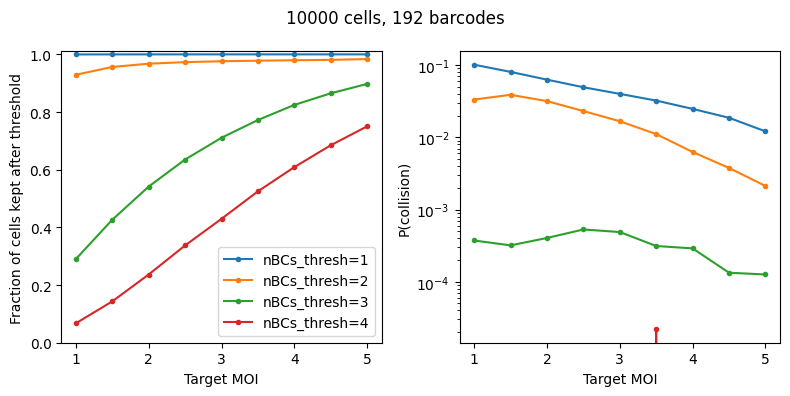

In [84]:
# moi_list = 

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
for u,uni_thresh in enumerate(thresh_list):
    plot_list = []
#     err_list = []s
    for t,target_moi in enumerate(moi_list):
        plot_list.append(np.mean(frac_passing_out[target_moi][uni_thresh]))
    plt.plot(moi_list,plot_list,label=f'nBCs_thresh={uni_thresh+1}',marker='.')
plt.xlabel('Target MOI')
plt.ylabel('Fraction of cells kept after threshold')
plt.legend()
plt.ylim(0,1.01)
        
plt.subplot(1,2,2)
for u,uni_thresh in enumerate(thresh_list):
    plot_list = []
    for t,target_moi in enumerate(moi_list):
        plot_list.append(np.mean(collision_out[target_moi][uni_thresh]))
    plt.plot(moi_list,plot_list,marker='.')
plt.xlabel('Target MOI')
plt.yscale('log')
plt.ylabel('P(collision)')

plt.suptitle(f'{n_cells} cells, {n_barcodes} barcodes')

plt.tight_layout()
plt.savefig(f'simulated_detection_{n_cells}cells_{n_barcodes}barcodes.pdf',bbox_inches='tight')
plt.savefig(f'simulated_detection_{n_cells}cells_{n_barcodes}barcodes.png',dpi=300,bbox_inches='tight')

In [17]:
len(counts[np.where(n_unique_bcs > uni_thresh)[0]])/len(counts)

0.5628779979144942

In [5]:
len(uniques) ### THIS NUMBER IS CLOSE TO 1-(n_0+n_1+n_2), essentially indicating that if you filter to cells with 3 or more, you rarely get multiples

7534

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_15264/2501995742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(counts[1:],kde=False,bins=bins)


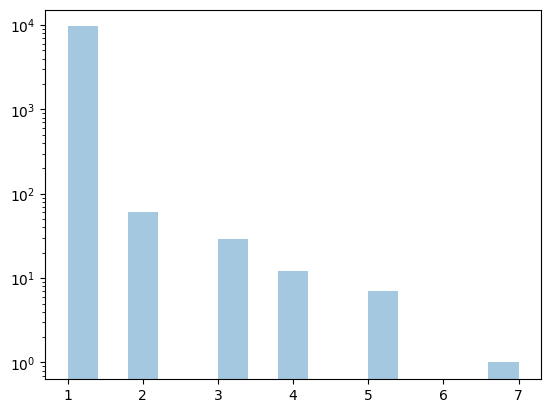

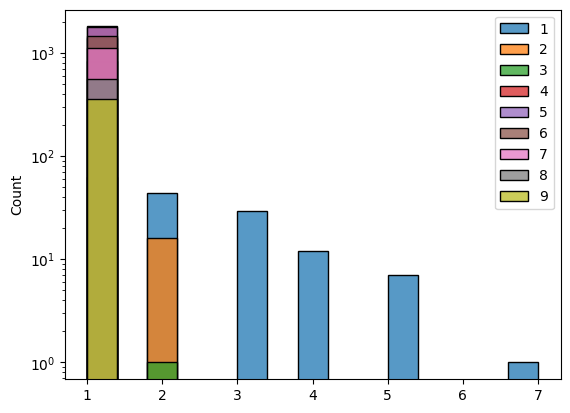

In [85]:
# bins = plt.hist(counts[1:])
bins = np.histogram_bin_edges(counts[1:],bins='auto')

sns.distplot(counts[1:],kde=False,bins=bins)
plt.yscale('log')

plt.figure()

for n_uni in range(1,10):
    
    ix = np.where(n_unique_bcs == n_uni)[0]
    
    sns.histplot(counts[ix],stat='count',bins=bins,label=n_uni)
plt.yscale('log')
plt.legend()

In [7]:
uniques[np.where(counts>5)[0]]

array(['', '63', '59', '14', '17', '31', '6', '62', '82', '10', '76',
       '18', '58', '11', '90', '19', '73', '80', '81', '69', '51', '44',
       '85', '20', '32', '22', '92', '50', '21', '72', '42', '94', '84',
       '78', '23', '61', '71', '86', '64', '40', '33', '13', '38', '41',
       '53', '55', '74', '45', '24', '75', '3', '25', '56', '46', '8',
       '35', '54', '39', '88', '34', '36', '66', '28', '37', '16', '48',
       '68', '91', '47', '2', '1', '29', '0', '65', '67', '49', '27',
       '26', '15', '43', '87', '83', '12', '89', '52', '60', '30', '95',
       '7', '5', '77', '93', '70', '9', '4', '79', '57'], dtype='<U32')

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_15264/2901068890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.poisson(target_moi,100000),kde=False)


<Axes: >

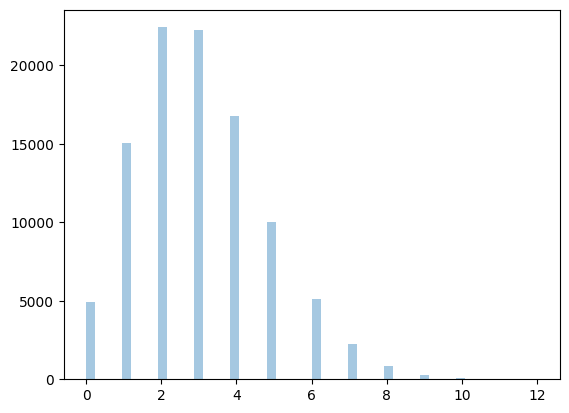

In [8]:
sns.distplot(np.random.poisson(target_moi,100000),kde=False)


<Axes: ylabel='Count'>

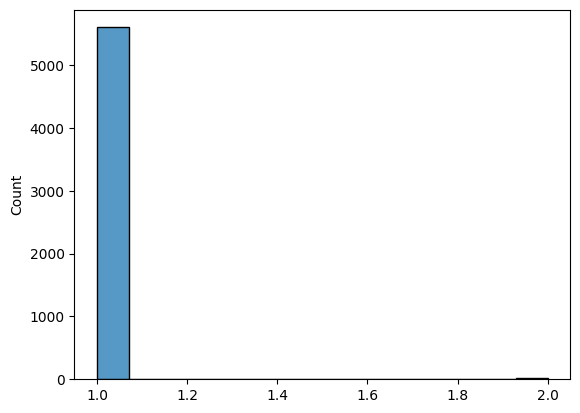

In [9]:
sns.histplot(counts[np.where(n_unique_bcs > 2)[0]])

In [296]:
uni_thresh = 2



0.00045521793558666213

In [10]:
sum(counts[np.where(n_unique_bcs > 2)[0]]>1)

14

In [298]:
## With MOI of 3 and 100,000 cells:
## Restricting to 2 or more unique gives ~90% chance of uniqueness
## Restricting to 3 or more unique gives ~97% chance of uniqueness

## What's the expected presence/absence distance -> how much does failing to detect a barcode contribute?